In [1]:
import os
from astropy.table import Table

In [2]:
TASSO_DRN = "/Users/aphearin/work/DATA/COSMOS20"
TASSO_BN = "COSMOS2020_Farmer_processed_hlin.fits"
TASSO_FN = os.path.join(TASSO_DRN, TASSO_BN)

cat = Table.read(TASSO_FN, format="fits", hdu=1)

sel_galaxies = cat["lp_type"] == 0
galaxies = cat[sel_galaxies]
print(galaxies.keys())

['ID', 'RA', 'DEC', 'CFHT_u_FLUX', 'CFHT_u_FLUXERR', 'CFHT_ustar_FLUX', 'CFHT_ustar_FLUXERR', 'HSC_g_FLUX', 'HSC_g_FLUXERR', 'HSC_r_FLUX', 'HSC_r_FLUXERR', 'HSC_i_FLUX', 'HSC_i_FLUXERR', 'HSC_z_FLUX', 'HSC_z_FLUXERR', 'HSC_y_FLUX', 'HSC_y_FLUXERR', 'UVISTA_Y_FLUX', 'UVISTA_Y_FLUXERR', 'UVISTA_J_FLUX', 'UVISTA_J_FLUXERR', 'UVISTA_H_FLUX', 'UVISTA_H_FLUXERR', 'UVISTA_Ks_FLUX', 'UVISTA_Ks_FLUXERR', 'IRAC_CH1_FLUX', 'IRAC_CH1_FLUXERR', 'IRAC_CH2_FLUX', 'IRAC_CH2_FLUXERR', 'photoz', 'lp_type', 'lp_zp_2', 'lp_zq', 'lp_model', 'lp_age', 'lp_dust', 'lp_Attenuation', 'lp_MFUV', 'lp_MNUV', 'lp_MU', 'lp_MG', 'lp_MR', 'lp_MI', 'lp_MZ', 'lp_MY', 'lp_MJ', 'lp_MH', 'lp_MK', 'lp_mass_med', 'lp_mass_med_min68', 'lp_mass_med_max68', 'lp_mass_best', 'lp_SFR_med', 'CFHT_ustar_MAG', 'CFHT_u_MAG', 'HSC_g_MAG', 'HSC_r_MAG', 'HSC_i_MAG', 'HSC_z_MAG', 'HSC_y_MAG', 'UVISTA_Y_MAG', 'UVISTA_J_MAG', 'UVISTA_H_MAG', 'UVISTA_Ks_MAG', 'IRAC_CH1_MAG', 'IRAC_CH2_MAG']


In [3]:
from cosmos20_colors.logsm_completeness import get_logsm_completeness

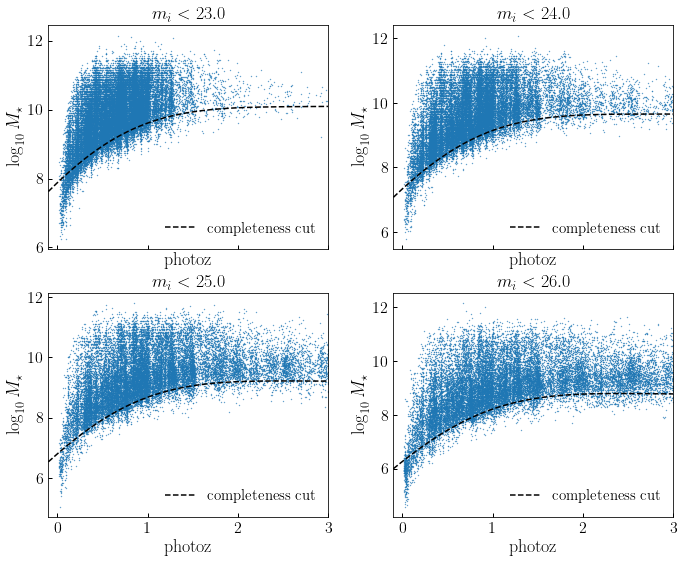

In [8]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
axes = ax0, ax1, ax2, ax3
fig.tight_layout(pad=3.0)

imag_cuts = (23, 24, 25, 26)
for ax, imag_cut in zip(axes, imag_cuts):

    sel_hsc_i_mag = galaxies["HSC_i_MAG"] < imag_cut
    sample = galaxies[sel_hsc_i_mag]
    
    npts_to_plot = 25000
    n_downsample = int(len(sample)/npts_to_plot)

    title = ax.set_title(r'$m_i < {0:.1f}$'.format(imag_cut))
    xlabel = ax.set_xlabel(r'${\rm photoz}$')
    ylabel = ax.set_ylabel(r'$\log_{10}M_{\star}$')
    __=ax.scatter(sample['photoz'][::n_downsample], sample['lp_mass_med'][::n_downsample], s=0.1)

    xlim = ax.set_xlim(-0.1, 3)
    zarr = np.linspace(*xlim, 500)
    __=ax.plot(zarr, get_logsm_completeness(zarr, imag_cut), '--', 
               color='k', label=r'${\rm completeness\ cut}$')
    leg = ax.legend()
    
fig.savefig('logsm_completeness_model_check.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200) 